<a href="https://colab.research.google.com/github/rayanqamarsyed/AIlab/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Libraries
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

data = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/Combined Data.csv')

# Step 3: Preprocess the Dataset
data = data.dropna(subset=['statement', 'status'])
texts = data['statement'].values
labels = data['status'].values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Step 4: Tokenize the Texts
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_length = 100
X = pad_sequences(sequences, maxlen=max_length)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Step 6: Build the RNN Model with LSTM
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),
    LSTM(64, return_sequences=False),
    Dropout(0.3),  # Decreased dropout rate to 0.3
    Dense(1, activation='sigmoid')  # Binary classification
])

# Step 7: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Step 9: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Step 10: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 11: Save the Model to Google Drive
model.save('/content/drive/My Drive/sentiment_rnn_model.h5')
print("Model saved to Google Drive as 'sentiment_rnn_model.h5'")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.0517 - loss: -33.6831 - val_accuracy: 0.0542 - val_loss: -94.4956
Epoch 2/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.0523 - loss: -111.8437 - val_accuracy: 0.0542 - val_loss: -166.4463
Epoch 3/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.0522 - loss: -182.9990 - val_accuracy: 0.0556 - val_loss: -237.8410
Epoch 4/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0540 - loss: -252.6449 - val_accuracy: 0.0564 - val_loss: -308.9474
Epoch 5/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0585 - loss: -323.1157 - val_accuracy: 0.0590 - val_loss: -384.0007
Epoch 6/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0639 - loss: -402.3101 - val_accuracy: 0.0643 - val_loss: -457.7712
Epoch 7/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.0739 - loss: -475.4193 - val_accuracy: 0.0658 - val_loss: -529.4047
Epoch 8/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accu

Test Accuracy: 0.08
Model saved to Google Drive as 'sentiment_rnn_model.h5'


In [2]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0830 - loss: -1449.7247
Test Accuracy: 0.08


In [3]:
# Sample texts for prediction
sample_texts = ["I feel anxious and restless.", "I'm feeling great today!"]

# Tokenize and pad the sample texts
sample_sequences = tokenizer.texts_to_sequences(sample_texts)
sample_padded = pad_sequences(sample_sequences, maxlen=max_length)

# Predict using the trained model
predictions = model.predict(sample_padded)

# Convert predictions back to labels
predicted_labels = (predictions > 0.5).astype(int)  # Assuming a threshold of 0.5 for binary classification
print(predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
[[0]
 [1]]


In [4]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,988,421 (15.21 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,658,948 (10.14 MB)

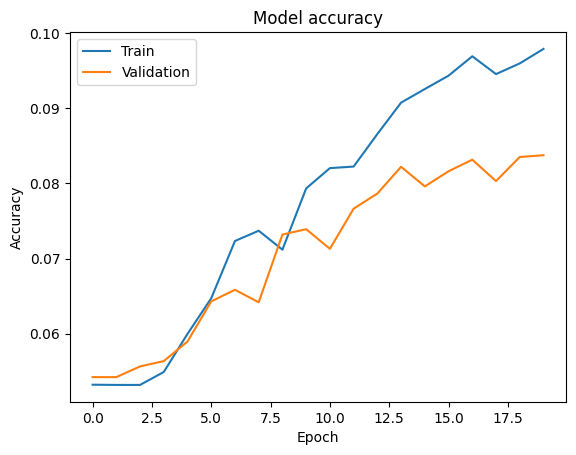

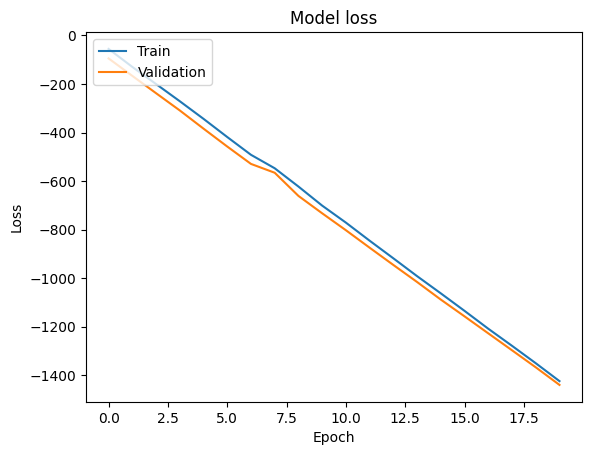

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
